In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("D:\cisco\letterboxd\Letterbox-Movie-Dataset.csv")

# Show basic info
print("Initial shape:", df.shape)
print(df.columns)
print(df.head())

# Step 1: Handle missing data
missing = df.isnull().sum()
print("\nMissing values:\n", missing[missing > 0])

Initial shape: (10000, 17)
Index(['Unnamed: 0', 'Film_title', 'Director', 'Average_rating', 'Genres',
       'Runtime', 'Original_language', 'Description', 'Studios', 'Watches',
       'List_appearances', 'Likes', 'Fans', 'Lowest★', 'Medium★★★',
       'Highest★★★★★', 'Total_ratings'],
      dtype='object')
   Unnamed: 0           Film_title         Director  Average_rating  \
0           0              The Fan  Eckhart Schmidt            3.57   
1           1   Mad Max: Fury Road    George Miller            4.18   
2           2             Suspiria    Dario Argento            3.93   
3           3  Lost in Translation    Sofia Coppola            3.79   
4           4                Akira  Katsuhiro Otomo            4.28   

                                       Genres  Runtime Original_language  \
0                         ['Horror', 'Drama']     92.0            German   
1  ['Adventure', 'Science Fiction', 'Action']    121.0           English   
2                                  [

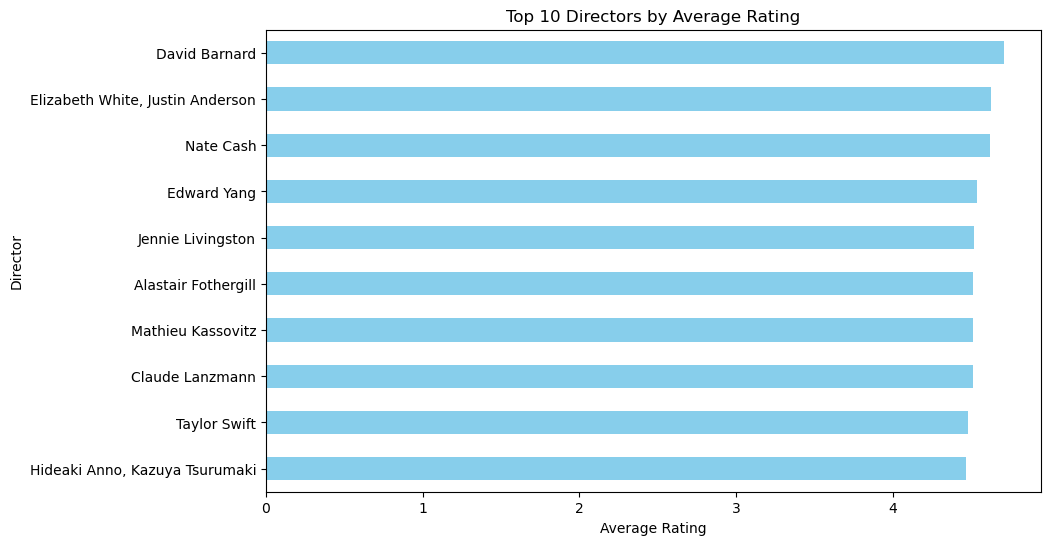

In [5]:
top_directors = df.groupby("Director")["Average_rating"].mean().sort_values(ascending=False).head(10)

top_directors.plot(kind="barh", figsize=(10, 6), color="skyblue")
plt.xlabel("Average Rating")
plt.title("Top 10 Directors by Average Rating")
plt.gca().invert_yaxis()
plt.show()

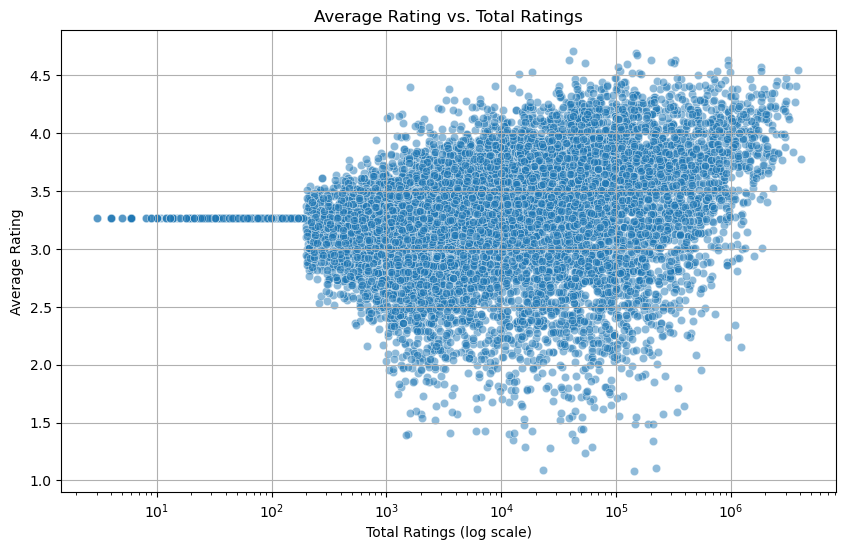

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Total_ratings", y="Average_rating", alpha=0.5)
plt.xscale('log')  # To handle large numbers better
plt.title("Average Rating vs. Total Ratings")
plt.xlabel("Total Ratings (log scale)")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

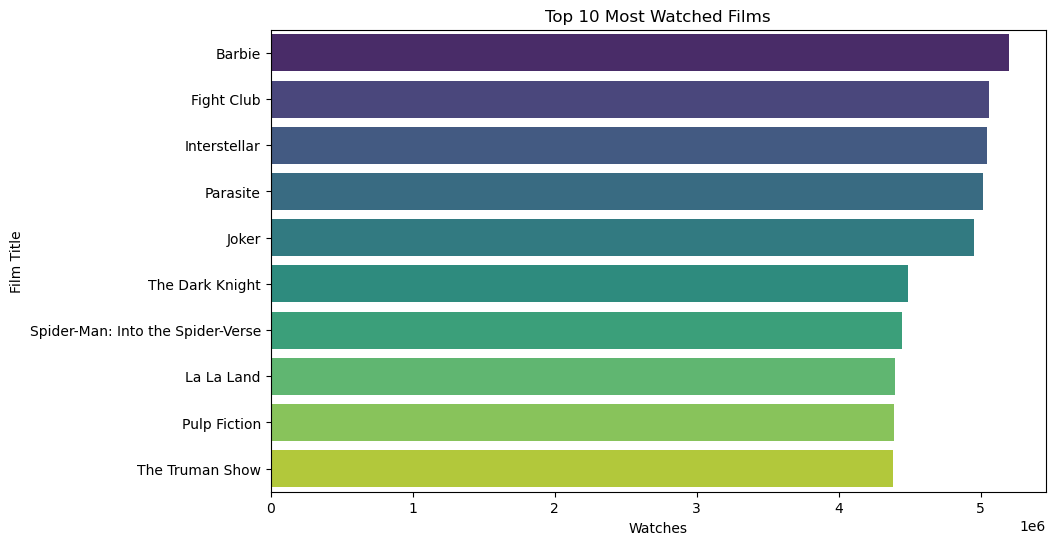

In [7]:
top_watched = df.sort_values("Watches", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_watched["Film_title"], x=top_watched["Watches"], palette="viridis")
plt.title("Top 10 Most Watched Films")
plt.xlabel("Watches")
plt.ylabel("Film Title")
plt.show()

In [11]:
import pandas as pd
import json

def safe_parse_genres(x):
    try:
        return json.loads(x.replace("'", '"')) if pd.notnull(x) else []
    except:
        return []

df['Genres'] = df['Genres'].apply(safe_parse_genres)

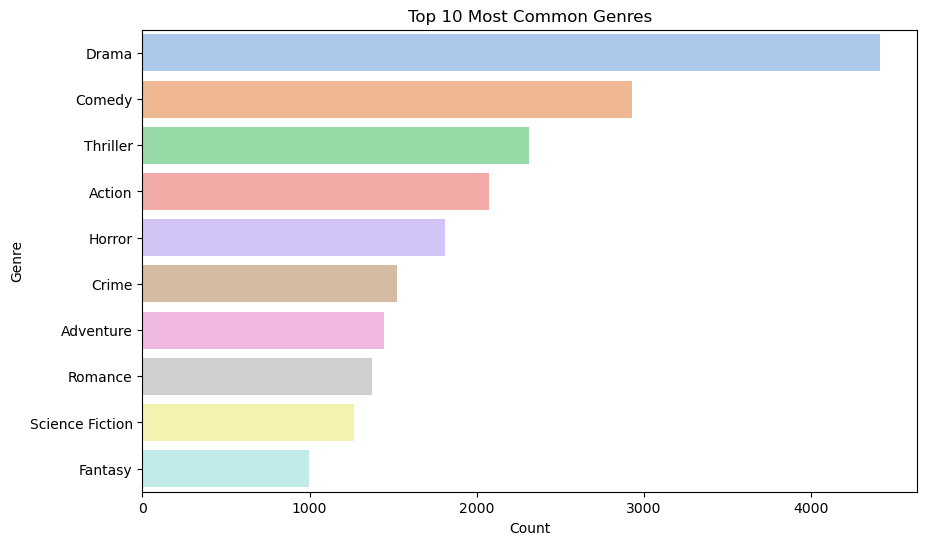

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten all genres
all_genres = [genre for sublist in df['Genres'] for genre in sublist]
genre_counts = Counter(all_genres).most_common(10)

# Plot
genres, counts = zip(*genre_counts)
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(genres), palette="pastel")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


In [13]:
df.to_csv("cleaned_letterboxd.csv", index=False)
print("Cleaned CSV saved.")

Cleaned CSV saved.


In [14]:
import pandas as pd

# Load the file
df = pd.read_csv("cleaned_letterboxd.csv")

# Optionally convert genres list strings to simple comma-separated text
df['Genres'] = df['Genres'].str.strip("[]").str.replace("'", "").str.replace(",", ";")

# Save clean version
df.to_csv("cleaned_letterboxd_for_sql.csv", index=False, quoting=1)  # quoting=1 = QUOTE_ALL